# Importing Necessary Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets

In [28]:
try:
    df_customers = pd.read_csv('purchase_behaviour.csv')
    df_transactions = pd.read_csv('transaction_data.csv')
except FileNotFoundError:
    print("Error: One or both CSV files not found. Please ensure they are in the correct directory.")

# Displaying Basic Information

### Head of CSVs

In [29]:
print("Head of Customer's CSV :- ")
display(df_customers.head())
print("Head of Transactions CSV :- ")
display(df_transactions.head())

Head of Customer's CSV :- 


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Head of Transactions CSV :- 


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Info

In [30]:
print("Info of Customer's DF :- \n")
df_customers.info()
print()
print("Info of Transaction's DF :- \n")
df_transactions.info()

Info of Customer's DF :- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

Info of Transaction's DF :- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 no

# Checking Missing Values (Already seen in above info also)

In [31]:
print(df_customers.isnull().sum())
print()
print(df_transactions.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


# Changing DataType of Date from int to DateTime

In [32]:
df_transactions['DATE'] = pd.to_datetime(df_transactions['DATE'])

# Merging datasets on LYLTY_CARD_NBR (Common Key)

In [33]:
df = df_transactions.merge(df_customers, on='LYLTY_CARD_NBR', how='left')

# Feature Engineering

In [34]:
df['TOTAL_SPEND'] = df['PROD_QTY'] * df['TOT_SALES']

# Identifying Top 3 Profitable Products

In [35]:
top_products = df.groupby('PROD_NAME')['TOTAL_SPEND'].sum().nlargest(3)
print("Top 3 Most Profitable Products:")
print(top_products)

Top 3 Most Profitable Products:
PROD_NAME
Dorito Corn Chp     Supreme 380g          336992.5
Smiths Crnkle Chip  Orgnl Big Bag 380g     71696.8
Kettle Mozzarella   Basil & Pesto 175g     68585.4
Name: TOTAL_SPEND, dtype: float64


It means that most people like to buy and eat chips

# Identifying Most Loyal Customers

In [36]:
top_customers = df.groupby('LYLTY_CARD_NBR')['TOTAL_SPEND'].sum().nlargest(10)
print("Top 10 Most Loyal Customers:")
print(top_customers)

Top 10 Most Loyal Customers:
LYLTY_CARD_NBR
226000    260000.0
209013       326.3
230154       324.4
63197        307.8
230078       306.8
222005       301.7
190113       301.1
269081       287.2
152172       284.6
190217       282.3
Name: TOTAL_SPEND, dtype: float64


# Analyzing Customer Segments

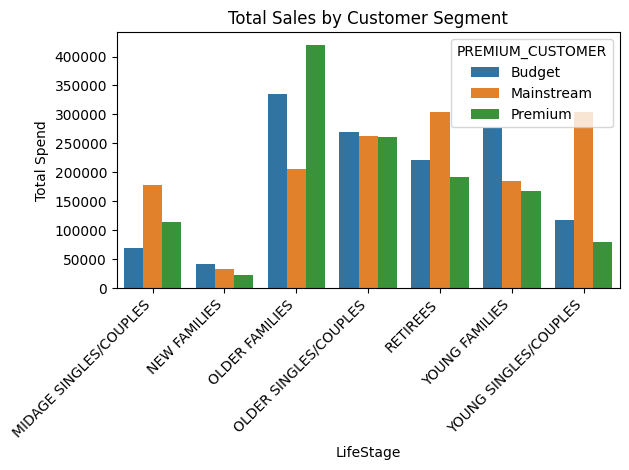

In [37]:
customer_segments = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOTAL_SPEND'].sum().reset_index()
sns.barplot(data=customer_segments, x='LIFESTAGE', y='TOTAL_SPEND', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45,ha='right')
plt.xlabel("LifeStage")
plt.ylabel("Total Spend")
plt.title("Total Sales by Customer Segment")
plt.tight_layout()
plt.show()

# Hypothesis

1. Older Families (especially Budget and Premium) are highly valuable customers due to a combination of factors: larger household sizes, higher  income, and potentially bulk purchasing habits.  They often have children and may be focused on grocery and household goods, which contributes to higher overall spending.

2. New Families Spend Less Initially: "NEW FAMILIES" show the lowest spending overall. This is likely due to initial setup costs and adjustments in spending habits as they welcome a new child. However, their spending could increase as their children grow older and their financial situation stabilizes.